## Book recommendation system using goodreads-10k dataset
https://www.kaggle.com/zygmunt/goodbooks-10k/

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

## Read books data and explore

In [2]:
books = pd.read_csv('archive/books.csv')
ratings = pd.read_csv('archive/ratings.csv')
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

## How are the ratings & ratings count distributed?

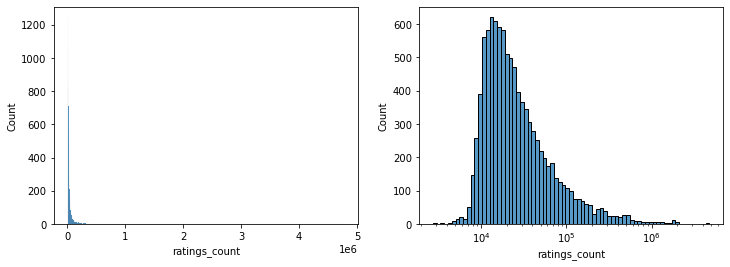

In [3]:
# number of ratings
#sns.set_palette("Set2")
f, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(books, x='ratings_count', ax=axs[0])
sns.histplot(books, x='ratings_count', log_scale=True, ax=axs[1])

## Look at average rating distribution

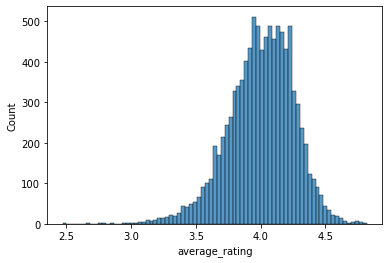

In [4]:
ax = sns.histplot(books, x='average_rating')

Kendall's tau: 0.0531
P value: 0.000000 



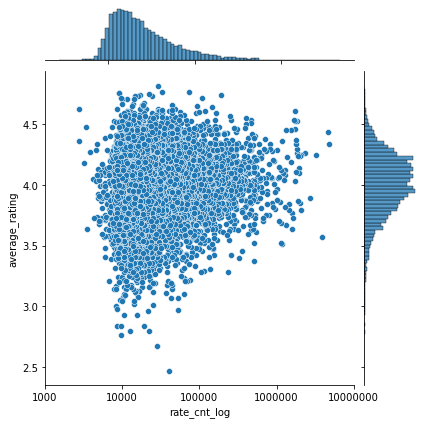

In [5]:
# g = sns.jointplot(x='ratings_count', y='average_rating', data=books)
# g.ax_joint.set_xscale('log')

b_dist = pd.DataFrame()
b_dist['average_rating'] = books['average_rating']
b_dist['rate_cnt_log'] = np.log10(books['ratings_count'])

g = sns.jointplot(x='rate_cnt_log', y='average_rating', data=b_dist)
g.ax_joint.set_xticks(np.arange(3, 8, 1))
_ = g.ax_joint.set_xticklabels(10**np.arange(3, 8, 1))

tau, p_value = kendalltau(books['ratings_count'], books['average_rating'])
print("Kendall\'s tau: %0.4f" % tau)
print("P value: %f \n" % p_value)

# tau, p_value = kendalltau(b_dist['rate_cnt_log'], b_dist['average_rating'])
# print("Kendall\'s tau: %0.4f" % tau)
# print("P value: %f \n" % p_value)

There is a positive correlation between ratings count and average rating. 

## When were the books originally published?

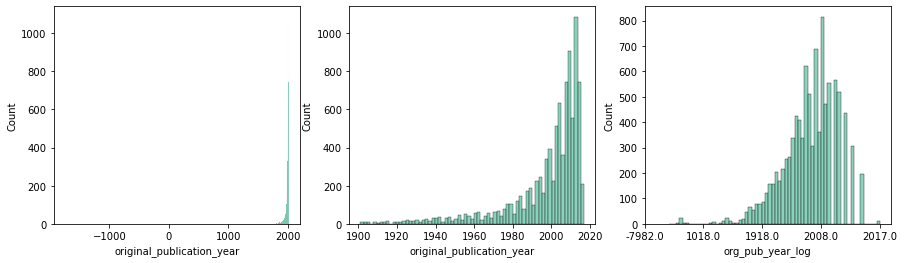

In [6]:
sns.set_palette("Set2")
b_dist['org_pub_year_log'] = -1*np.log10(max(books['original_publication_year'])-books['original_publication_year']+1)

f, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(books, x='original_publication_year', ax=axs[0])
sns.histplot(books[books['original_publication_year']>1900], x='original_publication_year', ax=axs[1])
sns.histplot(b_dist, x='org_pub_year_log', ax=axs[2])
axs[2].set_xticks(np.arange(-4, 1, 1))
_ = axs[2].set_xticklabels(max(books['original_publication_year'])+1 - 10**np.arange(4, -1, -1))

Original publication year and average rating
Kendall's tau: -0.0185
P value: 0.006595 

Original publication year and average rating for books published before 2010
Kendall's tau: -0.0403
P value: 0.000001 



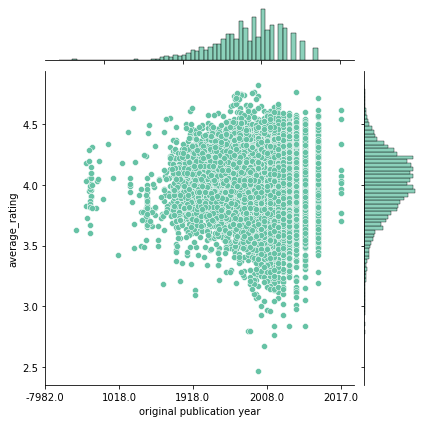

In [7]:
g = sns.jointplot(x='org_pub_year_log', y='average_rating', data=b_dist)
g.ax_joint.set_xticks(np.arange(-4, 1, 1))
_ = g.ax_joint.set_xticklabels(max(books['original_publication_year'])+1 - 10**np.arange(4, -1, -1))
g.ax_joint.set_xlabel('original publication year')

ind = books['original_publication_year'].notnull()
tau, p_value = kendalltau(
                        books[ind].original_publication_year,
                        books[ind].average_rating)
print("Original publication year and average rating")
print("Kendall\'s tau: %0.4f" % tau)
print("P value: %f \n" % p_value)

ind = books['original_publication_year'].notnull() & (books['original_publication_year'] < 2010) 
tau, p_value = kendalltau(
                        books[ind].original_publication_year,
                        books[ind].average_rating)
print("Original publication year and average rating for books published before 2010")
print("Kendall\'s tau: %0.4f" % tau)
print("P value: %f \n" % p_value)

There is a negative correlation between ratings count and original publication year. Older books are rated high. This trend is clearer when only books published before 2010 (approx. when the rating # peaks) are included.

## What languages are the books written in?

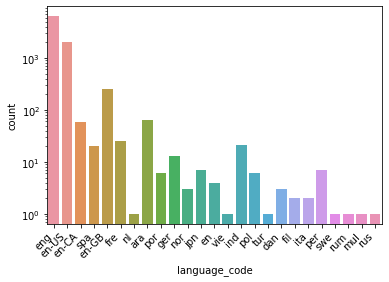

In [8]:
#books['language_code'] = books['language_code'].astype('category')
ax = sns.countplot(x='language_code', data=books) 
                   # kind='count', height=4, aspect=3, palette='Set3')
ax.set_yscale('log')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Looks like most of the books are in English. Combine all English language books and check the fraction.

In [9]:
books['lang'] = books['language_code'] 
books['lang'].loc[:][books['language_code'].str[:2]=='en'] = 'eng'
books['lang'].loc[:][books['language_code'].isnull()] = 'null'
lang_counts = books['lang'].value_counts()
# print(lang_counts)
print('%0.2f of the books are in English' % (lang_counts['eng']/sum(lang_counts)*100))
print('%0.2f of the books are missing language code' % (lang_counts['null']/sum(lang_counts)*100))

87.30 of the books are in English
10.84 of the books are missing language code


In [10]:
lang_sum = books[['average_rating', 'ratings_count', 'lang']].groupby('lang').mean().join(lang_counts)
lang_sum.rename(columns={'lang':'lang_count'}, inplace=True)
lang_sum.sort_values(by='lang_count', ascending=False)

,average_rating,ratings_count,lang_count
lang,,,
eng,4.003318,58257.127262,8730
null,4.002841,24875.133764,1084
ara,3.807500,16309.796875,64
fre,3.945600,28988.760000,25
ind,4.003810,11424.809524,21
spa,3.930000,79192.850000,20
ger,4.003846,20441.538462,13
jpn,4.162857,18165.857143,7
per,4.134286,4737.285714,7


Consider removing non-English books.

Look at: 
    Top rated books per decade
    Top rated authors per decade
    Most popular author by publication decade